# Transforming Data Using a Function or Mapping

In [2]:
import pandas as pd

df = pd.DataFrame(
	[('carrot', 'red', 1), 
	('papaya', 'yellow', 0),
	('mango', 'yellow', 0), 
	('apple', 'red', 0)
	], 
	columns=['species', 'color', 'type']
)
print("Dataframe before Mapping: ")
df



Dataframe before Mapping: 


,species,color,type
0,carrot,red,1
1,papaya,yellow,0
2,mango,yellow,0
3,apple,red,0


In [3]:
mappings = {
            	'carrot': 'veg',
            	'papaya': 'fruit'
}

In [12]:
df['food_type'] = df['species'].map(mappings)
print("Dataframe after Mapping: ")
df

Dataframe after Mapping: 


,species,color,type,type_name,food_type
0,carrot,red,1,veg,veg
1,papaya,yellow,0,fruit,fruit
2,mango,yellow,0,NaN,NaN
3,apple,red,0,NaN,NaN


In [5]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon','Pastrami', 'corned beef', 'Bacon','pastrami', 'honey ham', 'nova lox'],'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

In [6]:
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [7]:
meat_to_animal = {
            'bacon': 'pig',
            'pulled pork': 'pig',
            'pastrami': 'cow',
            'corned beef': 'cow',
            'honey ham': 'pig',
            'nova lox': 'salmon'
}

In [10]:
data['meat_source'] = data.food.str.lower().map(meat_to_animal)

In [11]:
data

,food,ounces,meat_source
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


# Discretization and Binning

In [13]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [51]:
df= pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [54]:
df.Gender.replace(["Male","Female",'Shemale'],[1,0, ],inplace=True)

C:\Users\Nasir Hussain\AppData\Local\Temp\ipykernel_15004\181928956.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Gender.replace(["Male","Female"],[1,0],inplace=True)


In [55]:
df.Gender.unique()

array([1, 0], dtype=int64)

In [16]:
df.Height.min(), df.Height.max()

(54.26313333, 78.99874235)

In [17]:
bins = [50,55,60,65,70,75,80]

In [31]:
cats= pd.cut(df.Height, bins)

In [32]:
cats

0       (70, 75]
1       (65, 70]
2       (70, 75]
3       (70, 75]
4       (65, 70]
          ...   
9995    (65, 70]
9996    (65, 70]
9997    (60, 65]
9998    (65, 70]
9999    (60, 65]
Name: Height, Length: 10000, dtype: category
Categories (6, interval[int64, right]): [(50, 55] < (55, 60] < (60, 65] < (65, 70] < (70, 75] < (75, 80]]

In [45]:
frequency = pd.value_counts(cats)
frequency

C:\Users\Nasir Hussain\AppData\Local\Temp\ipykernel_15004\2476040939.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequency = pd.value_counts(cats)


Height
(65, 70]    4312
(60, 65]    3397
(70, 75]    1793
(55, 60]     410
(75, 80]      85
(50, 55]       3
Name: count, dtype: int64

In [47]:
frequency.index =["(65, 70]", "(60, 65]","(70, 75]","(55, 60]","(75, 80]","(50, 55]"]

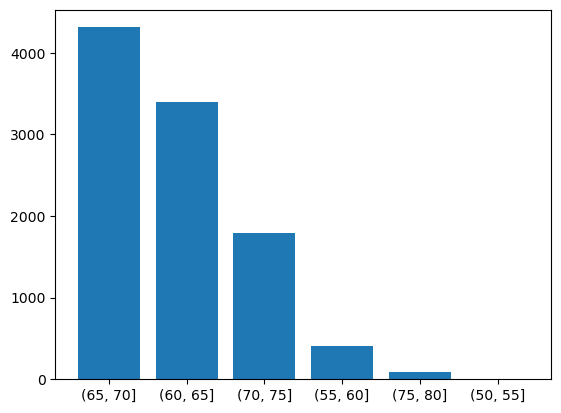

In [48]:
import matplotlib.pyplot as plt
plt.bar(x=frequency.index, height=frequency.values)
plt.show()

# Computing Indicator/Dummy Variables

In [56]:
data

,food,ounces,meat_source
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [59]:
data.food = data.food.str.lower()

In [60]:
data.food.unique()

array(['bacon', 'pulled pork', 'pastrami', 'corned beef', 'honey ham',
       'nova lox'], dtype=object)

In [61]:
data.food.replace(['bacon', 'pulled pork', 'pastrami', 'corned beef', 'honey ham',
       'nova lox'], [1,2,3,4,5,6])

C:\Users\Nasir Hussain\AppData\Local\Temp\ipykernel_15004\1488242614.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.food.replace(['bacon', 'pulled pork', 'pastrami', 'corned beef', 'honey ham',


0    1
1    2
2    1
3    3
4    4
5    1
6    3
7    5
8    6
Name: food, dtype: int64

In [63]:
pd.get_dummies(data,dtype=int)

,ounces,food_bacon,food_corned beef,food_honey ham,food_nova lox,food_pastrami,food_pulled pork,meat_source_cow,meat_source_pig,meat_source_salmon
0,4.0,1,0,0,0,0,0,0,1,0
1,3.0,0,0,0,0,0,1,0,1,0
2,12.0,1,0,0,0,0,0,0,1,0
3,6.0,0,0,0,0,1,0,1,0,0
4,7.5,0,1,0,0,0,0,1,0,0
5,8.0,1,0,0,0,0,0,0,1,0
6,3.0,0,0,0,0,1,0,1,0,0
7,5.0,0,0,1,0,0,0,0,1,0
8,6.0,0,0,0,1,0,0,0,0,1
